In [4]:
using Plots
using LinearAlgebra

In [210]:
function neumann_top(phi,N)
    phi[2,2:N+1]
end
function neumann_bottom(phi,N)
    phi[end-1,2:N+1]
end
function neumann_left(phi,N)
    phi[2:N+1,2]
end
function neumann_right(phi,N)
    phi[2:N+1,end-1]
end
function grid(L0,h,N)
    [ -L0 + h*(i-1) for i=1:N+1, j = 1:N+1]
end
function cell_center(X,N)
    0.5(X[1:N,1:N]+X[2:N+1,2:N+1])
end
function init_circle(X,Y,radius,N)
    R = radius*[1 for i = 1:N, j = 1:N];
    X.^2 + Y.^2 - R
end
function find_inflow(phibc,i,j,h,c)
        stencil = Array{CartesianIndex{2},1}(undef, 0);
        for k = i-1:2:i+1
            a = h*(-c)*((phibc[k,j]-phibc[i,j])/sqrt(((phibc[k,j]-phibc[i,j])^2)))
            if a < 0.
                push!(stencil,CartesianIndex(k, j))
            end
        end
        for k = j-1:2:j+1
            a = h*(-c)*((phibc[i,k]-phibc[i,j])/sqrt(((phibc[i,k]-phibc[i,j])^2)))
            if a < 0.
                push!(stencil,CartesianIndex(i, k))
            end
        end
        stencil
end

find_inflow (generic function with 2 methods)

In [373]:
N = 30
L0 = 2.
h = 2*L0/N
radius = 1.
X = cell_center(transpose(grid(L0,h,N)),N);
Y = cell_center(grid(L0,h,N),N);

phibc = zeros(N+2,N+2)
phibc[2:N+1,2:N+1] = init_circle(X,Y,radius,N)
phibc[1,2:N+1] = phibc[2,2:N+1];
phibc[end,2:N+1] = phibc[end-1,2:N+1]
phibc[2:N+1,1] = phibc[2:N+1,2]
phibc[2:N+1,end] = phibc[2:N+1,end-1]

phi0 = phibc[2:N+1,2:N+1]

#pyplot()
#plot(X,Y,phi,st=:surface,camera=(30,30))

#pos = findall(x->x<0,phi);
#scatter(X[pos],Y[pos],legend = false, xlims = (-1.1*L0,1.1*L0), ylims = (-1.1*L0,1.1*L0))
#pos
#push!(pos,CartesianIndex(431, 50))

In [374]:
c = 1.
tau = 0.001
nt = 200

for n = 1:nt
for i = 2:N+1
    for j = 2:N+1
        lv = 0.
        cm = 0.
        stc = find_inflow(phibc,i,j,h,c)
            if length(stc) > 0
                for k = 1:length(stc)
                    lv += -1. *(-c)*h*(phibc[stc[k]]-phibc[i,j])/sqrt((phibc[stc[k]]-phibc[i,j])^2)
                    cm += (-1.) *(-c)*h*phibc[stc[k]]*(phibc[stc[k]]-phibc[i,j])/sqrt((phibc[stc[k]]-phibc[i,j])^2)
                    #println(k)
                end
            end
            phibc[i,j] = phibc[i,j]*(1. - (tau/h^2)*lv) + (tau/h^2)*cm
    end
end
phibc[1,2:N+1] = phibc[2,2:N+1];
phibc[end,2:N+1] = phibc[end-1,2:N+1];
phibc[2:N+1,1] = phibc[2:N+1,2];
phibc[2:N+1,end] = phibc[2:N+1,end-1];
end    

In [375]:
pos = findall(x->x<0,phibc[2:N+1,2:N+1])
analytical = radius - nt*tau
findmax(X[pos]), analytical, h

((0.7333333333333332, 91), 0.8, 0.13333333333333333)

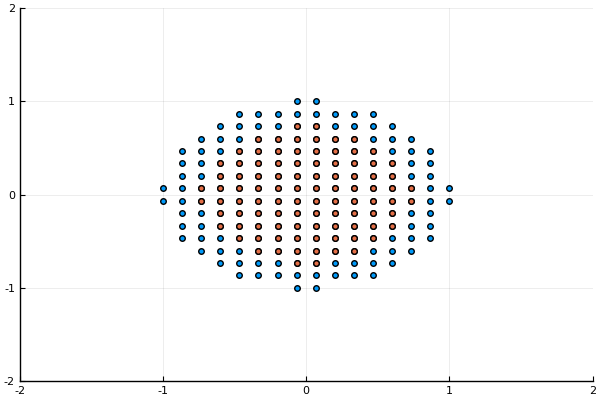

In [376]:
pos = findall(x->x<0.01,phibc[2:N+1,2:N+1])
pos2 = findall(x->x<0.01,phi0)

scatter(X[pos2],Y[pos2],legend = false, xlims = (-L0,L0), ylims = (-L0,L0))
scatter!(X[pos],Y[pos],legend = false, xlims = (-L0,L0), ylims = (-L0,L0))

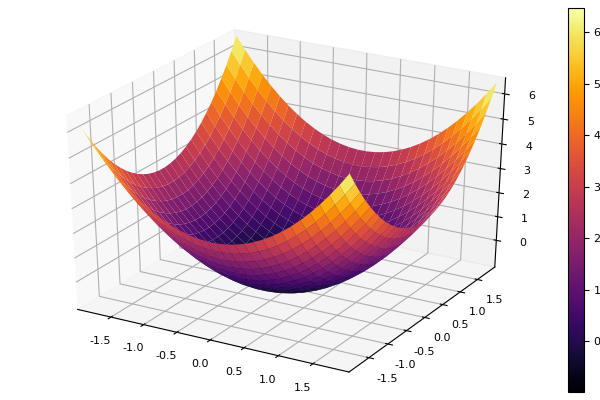

In [377]:
pyplot()
plot(X,Y,phi0,st=:surface,camera=(30,30))

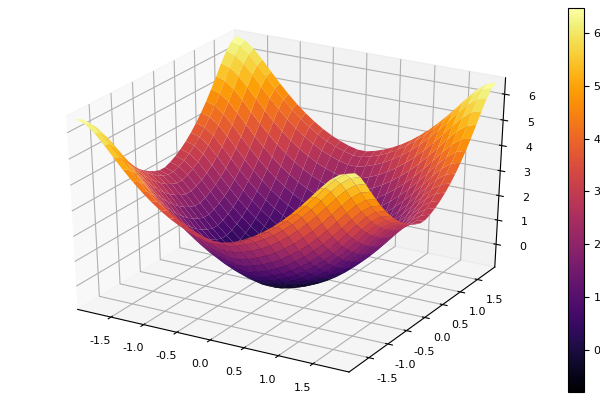

In [378]:
plot(X,Y,phibc[2:N+1,2:N+1],st=:surface,camera=(30,30))